In [ ]:
import os

fpath = os.getcwd()[:-12]+"\\Fixed_Length_GA"
print(fpath)
os.chdir(fpath)
os.getcwd()

with open("hyperparameters/seedfile.txt", "rb") as f:
        seed_value = int(f.read())

import numpy as np
np.random.seed(seed_value)

import shutil

from tqdm import tqdm

from scipy.linalg import expm, sqrtm, logm

import matplotlib.pyplot as plt
%matplotlib inline

import GA
import physics_functions
import physics_classes
import utils

In [2]:
N_levs = 20
Omega_S = 1.
g = 1.
beta_range = 5.
npdtype ="complex128"
beta = 1.

rho0_tuple = ("number", 0)        
model_tc1 = physics_classes.model_thermalAncillas(rho0_tuple, N_levs, Omega_S, 1., g, beta_range, npdtype)
model_tc05 = physics_classes.model_thermalAncillas(rho0_tuple, N_levs, Omega_S, 0.5, g, beta_range, npdtype)
model_tc01 = physics_classes.model_thermalAncillas(rho0_tuple, N_levs, Omega_S, 0.1, g, beta_range, npdtype)
target = physics_functions.init_system_state(model_tc1.H_sys, model_tc1.a, model_tc1.a_dag, ("thermal", 1.), [])

TrD0 = physics_functions.trace_distance(model_tc1.rhoS_0, target)

x_tc1 = [TrD0] + [-np.loadtxt("results/genericAncillas_n0tobeta1_tc1Nc" + str(Nc) +"/history")[-1] for Nc in [1, 2, 3, 4, 5]]
x_tc05 = [TrD0] +[-np.loadtxt("results/genericAncillas_n0tobeta1_tc05Nc" + str(Nc) +"/history")[-1] for Nc in [2, 4, 6, 8, 10]]
x_tc01 = [TrD0] +[-np.loadtxt("results/genericAncillas_n0tobeta1_tc01Nc" + str(Nc) +"/history")[-1] for Nc in [10, 20, 30, 40, 50]]

th_tc1 = [TrD0] + [-np.loadtxt("results/thermalAncillas_n0tobeta1_tc1Nc" + str(Nc) +"/history")[-1] for Nc in [1, 2, 3, 4, 5]]
th_tc05 = [TrD0] +[-np.loadtxt("results/thermalAncillas_n0tobeta1_tc05Nc" + str(Nc) +"/history")[-1] for Nc in [2, 4, 6, 8, 10]]
th_tc01 = [TrD0] +[-np.loadtxt("results/thermalAncillas_n0tobeta1_tc01Nc" + str(Nc) +"/history")[-1] for Nc in [10, 20, 30, 40, 50]]

x_coherent = -np.loadtxt("results/genericAncillas_n0tocoherent1_tc05Nc10/history")[-1]
th_coherent = -np.loadtxt("results/thermalAncillas_n0tocoherent1_tc05Nc10/history")[-1]


array([ 0.        ,  0.        ,  0.        , 10.16340456, 16.44368431,
       35.39872187])

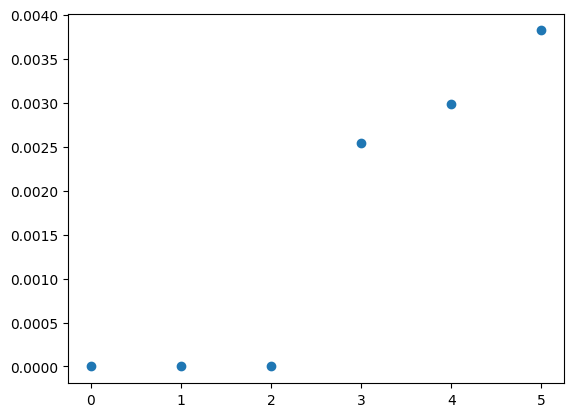

In [4]:
plt.plot(np.array(x_tc1)-np.array(th_tc1), 'o')
(100*np.absolute(np.array(x_tc1)-np.array(th_tc1))/np.array(x_tc1))

0.003577500000000001


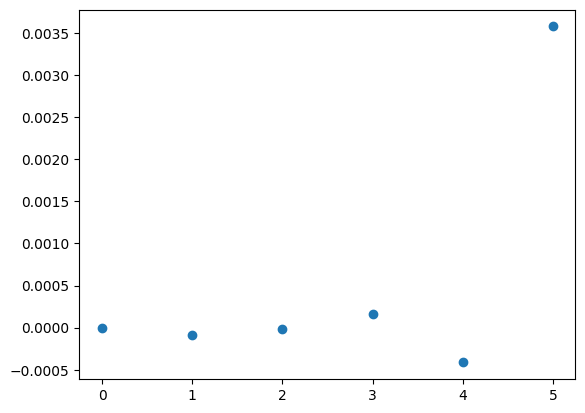

In [4]:
plt.plot(np.array(x_tc05)-np.array(th_tc05), 'o')
print(np.absolute(np.array(x_tc05)-np.array(th_tc05)).max())

0.010651500000000001


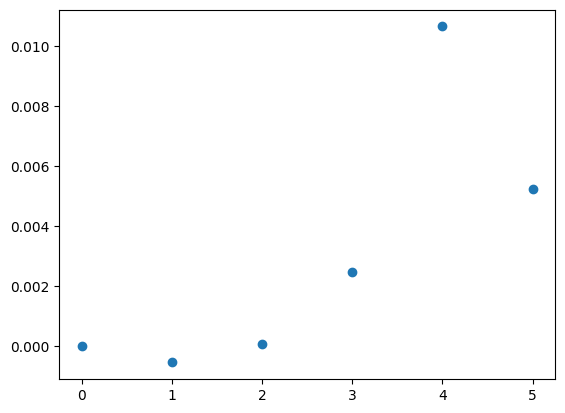

In [5]:
plt.plot(np.array(x_tc01)-np.array(th_tc01), 'o')
print(np.absolute(np.array(x_tc01)-np.array(th_tc01)).max())

In [6]:
print(x_coherent, th_coherent)

0.033013 0.694764
